In [2]:
import geopandas as gpd

# Carrega o shapefile de risco de ocorrência de desastres naturais
gdf = gpd.read_file('../dados/instituicoes_ensino/SIRGAS_SHP_TEMA_EDUCACAO_REDE_PUBLICA_EDUCACAO_INFANTIL.shp')

<Axes: >

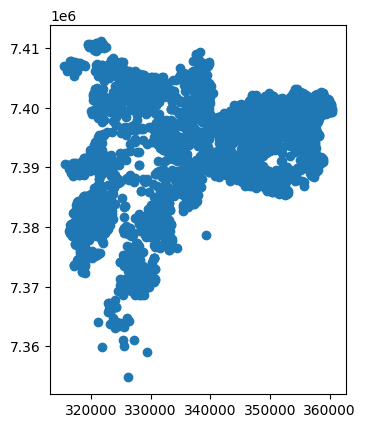

In [3]:
gdf.plot()

In [13]:
gdf.head()

,eq_nome,eq_enderec,eq_bairro,eq_cep,eq_horario,eq_telefon,eq_regiao,eq_distrit,eq_subpref,eq_esfera,eq_classe,eq_rede,eq_tipo,geometry
0,CEMEI IRAPARA,"IRAPARA, 160",PARAISO DO MORUMBI,05706-300,None,35010143,SUL,83,17,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CEMEI,POINT (323945.848 7386714.627)
1,CEMEI MORUMBI,"JOSE PEDRO DE CARVALHO LIMA, 150",JARDIM PARQUE MORUMBI,05712-080,None,37429760,SUL,83,17,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CEMEI,POINT (323669 7386404.5)
2,EMEI ANTONIO BENTO,"JOAO BATISTA DE SOUSA FILHO, 405",CAXINGUI,05515-040,None,37225142,OESTE,12,10,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,EMEI,POINT (324900.409 7391268.636)
3,EMEI MONTE CASTELO,"MONTE CASTELO, 49",BUTANTA,05505-050,None,38197850,OESTE,12,10,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,EMEI,POINT (325730.246 7392397.837)
4,EMEI NIDA MALDI CORAZZA EDUCADORA,"PROFESSORA ABIGAIL ALVES PIRES, 76",JARDIM SARAH,05381-000,None,37636982,OESTE,67,10,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,EMEI,POINT (320244.357 7391934.526)


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   eq_nome     3028 non-null   object  
 1   eq_enderec  3028 non-null   object  
 2   eq_bairro   3028 non-null   object  
 3   eq_cep      3028 non-null   object  
 4   eq_horario  0 non-null      object  
 5   eq_telefon  2892 non-null   object  
 6   eq_regiao   3027 non-null   object  
 7   eq_distrit  3027 non-null   object  
 8   eq_subpref  3027 non-null   object  
 9   eq_esfera   3028 non-null   object  
 10  eq_classe   3028 non-null   object  
 11  eq_rede     3028 non-null   object  
 12  eq_tipo     3028 non-null   object  
 13  geometry    3028 non-null   geometry
dtypes: geometry(1), object(13)
memory usage: 331.3+ KB


In [14]:
gdf_novo = gdf.copy()

In [17]:
gdf_novo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   eq_nome     3028 non-null   object
 1   eq_enderec  3028 non-null   object
 2   eq_bairro   3028 non-null   object
 3   eq_cep      3028 non-null   object
 4   eq_horario  0 non-null      object
 5   eq_telefon  2892 non-null   object
 6   eq_regiao   3027 non-null   object
 7   eq_distrit  3027 non-null   object
 8   eq_subpref  3027 non-null   object
 9   eq_esfera   3028 non-null   object
 10  eq_classe   3028 non-null   object
 11  eq_rede     3028 non-null   object
 12  eq_tipo     3028 non-null   object
 13  geometry    3028 non-null   object
dtypes: object(14)
memory usage: 331.3+ KB


In [16]:
gdf_novo['geometry'] = gdf_novo['geometry'].astype(str)

C:\Users\prado\AppData\Local\Temp\ipykernel_14648\3055552666.py:1: UserWarning: Geometry column does not contain geometry.
  gdf_novo['geometry'] = gdf_novo['geometry'].astype(str)


In [20]:
import pandas as pd
from pyproj import Proj
import re

# Definindo o sistema de coordenadas UTM zona 23S
utm_proj = Proj(proj='utm', zone=23, south=True, ellps='WGS84')

# Função para extrair coordenadas e converter para latitude/longitude
def utm_para_latlon(geometry):
    match = re.match(r'POINT \((\d+\.\d+) (\d+\.\d+)\)', geometry)
    if match:
        easting = float(match.group(1))
        northing = float(match.group(2))
        lon, lat = utm_proj(easting, northing, inverse=True)
        return lat, lon
    else:
        # Retorne valores padrão ou trate o caso de não correspondência
        return None, None

# Aplicar a função para criar as novas colunas 'Latitude' e 'Longitude'
gdf_novo['Latitude'], gdf_novo['Longitude'] = zip(*gdf_novo['geometry'].apply(utm_para_latlon))

# Exibindo o DataFrame atualizado
gdf_novo

,eq_nome,eq_enderec,eq_bairro,eq_cep,eq_horario,eq_telefon,eq_regiao,eq_distrit,eq_subpref,eq_esfera,eq_classe,eq_rede,eq_tipo,geometry,Latitude,Longitude
0,CEMEI IRAPARA,"IRAPARA, 160",PARAISO DO MORUMBI,05706-300,None,35010143,SUL,83,17,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CEMEI,POINT (323945.847889 7386714.627042),-23.620601,-46.725724
1,CEMEI MORUMBI,"JOSE PEDRO DE CARVALHO LIMA, 150",JARDIM PARQUE MORUMBI,05712-080,None,37429760,SUL,83,17,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CEMEI,POINT (323669 7386404.5),NaN,NaN
2,EMEI ANTONIO BENTO,"JOAO BATISTA DE SOUSA FILHO, 405",CAXINGUI,05515-040,None,37225142,OESTE,12,10,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,EMEI,POINT (324900.408744 7391268.63579),-23.579588,-46.715835
3,EMEI MONTE CASTELO,"MONTE CASTELO, 49",BUTANTA,05505-050,None,38197850,OESTE,12,10,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,EMEI,POINT (325730.24627 7392397.836516),-23.569482,-46.707574
4,EMEI NIDA MALDI CORAZZA EDUCADORA,"PROFESSORA ABIGAIL ALVES PIRES, 76",JARDIM SARAH,05381-000,None,37636982,OESTE,67,10,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,EMEI,POINT (320244.356764 7391934.52612),-23.573066,-46.761364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,CR P CONV JOAO DIAS,"CIRENE DE OLIVEIRA LAET, 675",VILA NILO,02279-010,None,26797796,NORTE,39,06,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CR.P.CONV,POINT (339146.082654 7404715.598671),-23.459648,-46.574836
3024,CR P CONV OSVALDO MOREIRA,"DAS IMBIRAS, 777",VILA NOVA MAZZEI,02316-000,None,25336368,NORTE,81,06,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CR.P.CONV,POINT (337207.60452 7404685.251899),-23.459730,-46.593813
3025,CR P CONV PEQUENOS PASSOS,"GUAPIRA, 2089",TUCURUVI,02265-002,None,22062566,NORTE,39,06,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CR.P.CONV,POINT (337973.148253 7403446.64049),-23.470990,-46.586453
3026,CR P CONV CAMINHO CERTO II,"MORRO DO LIVRAMENTO, 170",VILA NOVA GALVAO,02281-000,None,22473833,NORTE,39,06,PRIVADA,REDE_PUBLICA_EDUCACAO_INFANTIL,SEM REDE,CR.P.CONV,POINT (339376.881599 7405677.232215),-23.450988,-46.572474


In [52]:
import folium
from folium.plugins import MarkerCluster

# Criando um mapa inicial com as coordenadas de SP
map = folium.Map(location=[-23.5505, -46.6333], zoom_start=10)

# Adicionando um marcador ao mapa
marker_cluster = MarkerCluster().add_to(map)

# Iterando pelas Lat/Lon para adicionar ao mapa
folium.Marker(
    location=[-23.626315, -46.600429], popup=['ESTAB_SA']).add_to(map)
map